## Data Dictionary 

In [2]:
# Please import kid.csv

Here are the variables that magazine reseller has on each customer from third-party sources:
Household Income (Income; rounded to the nearest $1,000.00)

Gender (IsFemale = 1 if the person is female, 0 otherwise)

Marital Status (IsMarried = 1 if married, 0 otherwise)

College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)

Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)

Retired (IsRetired = 1 if retired, 0 otherwise)

Not employed (Unemployed = 1 if not employed, 0 otherwise)

Length of Residency in Current City (ResLength; in years)

Dual Income if Married (Dual = 1 if dual income, 0 otherwise)

Children (Minors = 1 if children under 18 are in the household, 0 otherwise)

Home ownership (Own = 1 if own residence, 0 otherwise)

Resident type (House = 1 if the residence is a single-family house, 0 otherwise)

Race (White = 1 if the race is white, 0 otherwise)

Language (English = 1 is the primary language in the household is English, 0 otherwise)

With this dataset, we will be building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not. At last, we’ll evaluate our model using the confusion matrix.

In [3]:
# Import relevant modules and file:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



file1 = '/Users/dbuettner/nf-ds/Logistic/Logistic_Regression_without_solutions/Kid.csv'
df1 = pd.read_csv(file1)
df1_copy = df1.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 18 columns):
Obs No.             673 non-null int64
Buy                 673 non-null int64
Income              673 non-null int64
Is Female           673 non-null int64
Is Married          673 non-null int64
Has College         673 non-null int64
Is Professional     673 non-null int64
Is Retired          673 non-null int64
Unemployed          673 non-null int64
Residence Length    673 non-null int64
Dual Income         673 non-null int64
Minors              673 non-null int64
Own                 673 non-null int64
House               673 non-null int64
White               673 non-null int64
English             673 non-null int64
Prev Child Mag      673 non-null int64
Prev Parent Mag     673 non-null int64
dtypes: int64(18)
memory usage: 94.7 KB


In [5]:
df1.describe()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
count,673.00000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,337.00000,0.185736,35078.751857,0.551263,0.349183,0.289747,0.341753,0.057949,0.031204,17.618128,0.231798,0.364042,0.362556,0.667162,0.692422,0.909361,0.071322,0.084695
std,194.42265,0.389182,23812.787498,0.497735,0.477066,0.453982,0.474650,0.233822,0.173997,13.555818,0.422294,0.481518,0.481096,0.471580,0.461834,0.287308,0.257554,0.278635
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.00000,0.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,337.00000,0.000000,32000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,505.00000,0.000000,52000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,673.00000,1.000000,75000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df1.drop('Obs No.', axis=1, inplace=True)

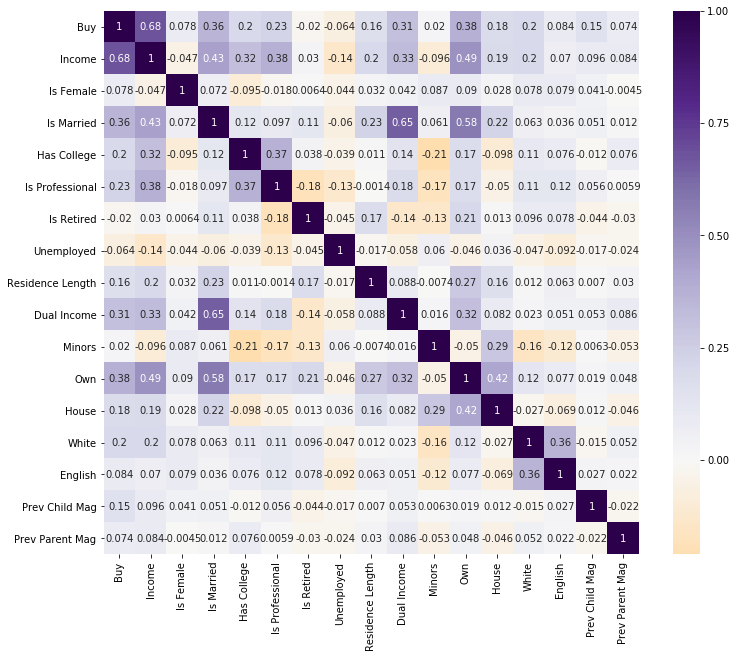

In [7]:
corr_mat = df1.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, cmap='PuOr', center=0.0, annot=True, annot_kws={'size': 10})
plt.show()

In [8]:
corr_mat.loc['Buy', :].sort_values(ascending=False)

Buy                 1.000000
Income              0.679241
Own                 0.378955
Is Married          0.355479
Dual Income         0.308080
Is Professional     0.227822
White               0.202405
Has College         0.200299
House               0.183283
Residence Length    0.163242
Prev Child Mag      0.149717
English             0.084241
Is Female           0.077529
Prev Parent Mag     0.074282
Minors              0.019811
Is Retired         -0.020338
Unemployed         -0.063738
Name: Buy, dtype: float64

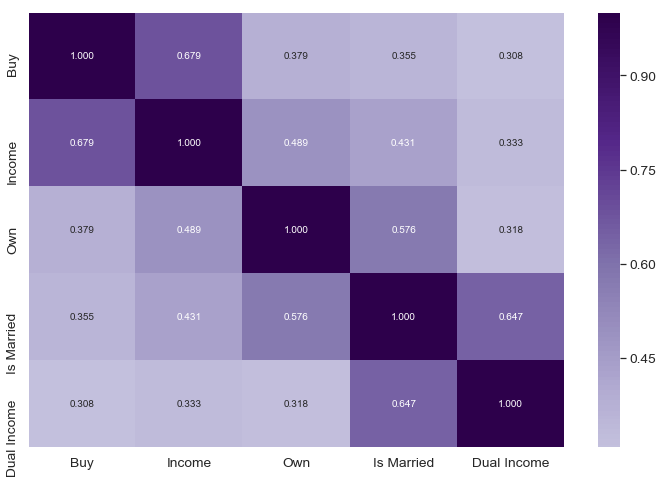

In [9]:
k = 5 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'Buy')['Buy'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12,8))
hm = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='PuOr', center=0.0)
plt.show()

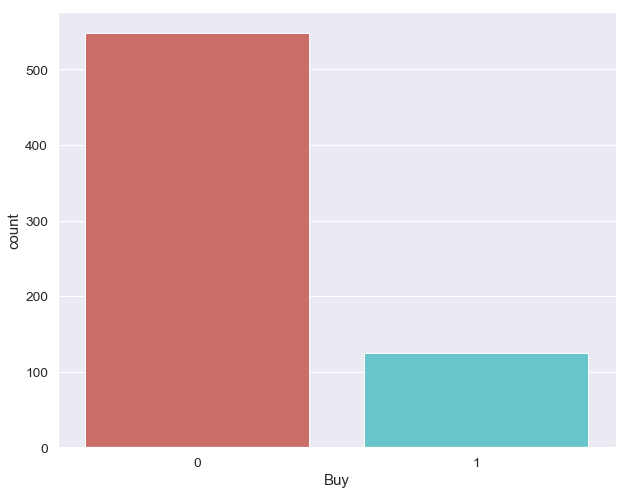

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='Buy',data=df1, palette='hls')

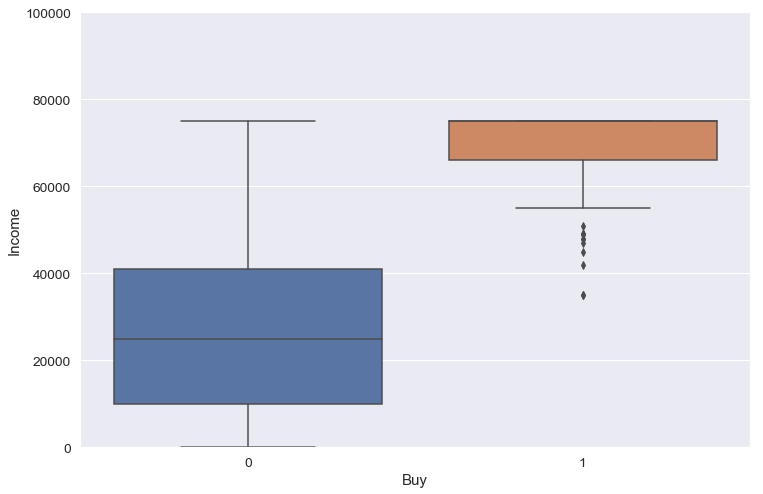

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1, x='Buy', y='Income')
plt.ylim(0,100000)
plt.show()

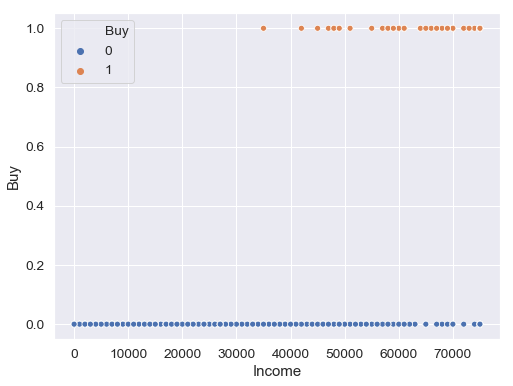

In [12]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='Income', y='Buy', hue='Buy', data=df1)
plt.show()


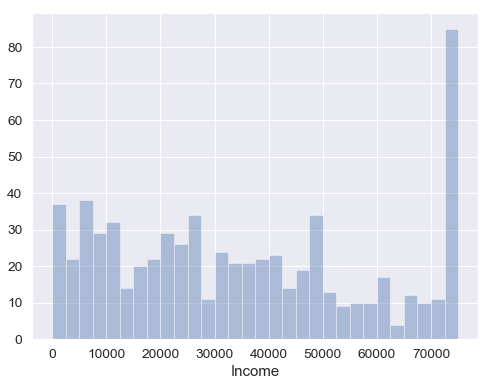

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Income'], bins=30, kde=False)

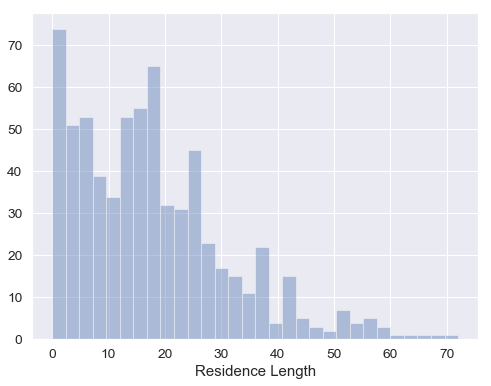

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Residence Length'], bins=30, kde=False)

In [15]:
cols = df1.columns[:]
cols

Index(['Buy', 'Income', 'Is Female', 'Is Married', 'Has College',
       'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length',
       'Dual Income', 'Minors', 'Own', 'House', 'White', 'English',
       'Prev Child Mag', 'Prev Parent Mag'],
      dtype='object')

In [16]:
#cols = df1.columns[1:]
cols = ['Income', 'Is Married', 'Own']
X = df1.loc[:, cols].values
y = df1.loc[:, 'Buy'].values

In [17]:
#df1.loc[:, cols]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [19]:
#LogReg = LogisticRegression(solver='lbfgs')   # otherwise solver set to 'lbfgs' (in the future)
LogReg = LogisticRegression()          # for one vs rest, standard 'liblinear
LogReg.fit(X_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = LogReg.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[108,   6],
       [  5,  16]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       114
           1       0.73      0.76      0.74        21

    accuracy                           0.92       135
   macro avg       0.84      0.85      0.85       135
weighted avg       0.92      0.92      0.92       135



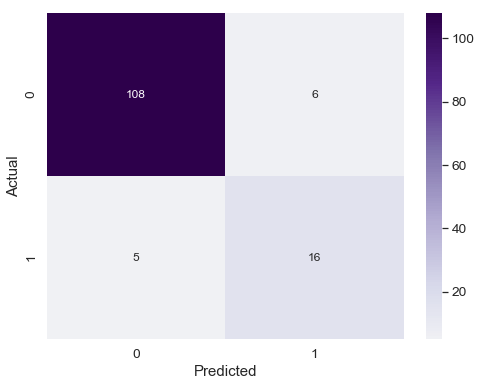

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
#sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 10}, fmt='% 4.2f')
sns.heatmap(confusion_matrix, annot=True, annot_kws={'size': 12}, fmt='d', cmap='PuOr', center=0.0)

#print('Accuracy:  ',metrics.accuracy_score(y_test, y_pred))
#print('Precision: ',metrics.precision_score(y_test, y_pred))
##print('Recall:    ',metrics.recall_score(y_test, y_pred))
#print('f1-Score:  ',metrics.f1_score(y_test, y_pred))

In [24]:
LogReg.coef_

array([[ 4.61411673e-05, -5.89291886e-02,  1.14858253e-01]])

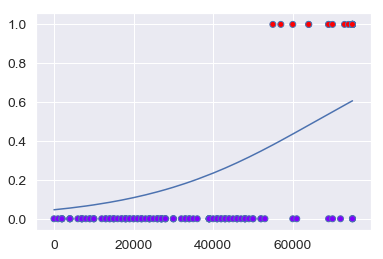

In [25]:
df2 = pd.DataFrame({'x': X_test[:,0], 'y': y_test})
df2 = df2.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df2['x'] * LogReg.coef_[0][0] + LogReg.intercept_[0]).ravel()
plt.plot(df2['x'], sigmoid_function)
plt.scatter(df2['x'], df2['y'], c=df2['y'], cmap='rainbow', edgecolors='b')